# Machine learning project 1

**In this project I will be practicing using a problem from Kaggle.com. I will predict the price of an apartment rental listing based on the listing content such as text description, photos, number of bedrooms, price, etc. The data comes from renthop.com, an apartment listing website.**

## Intro

### 5 examples of ML methods in life

- 1. To start with, carsharing operators predict the most suitable price to balance supply and demand on their cars using data about how frequently people use their cars in different periods of time. This may help prevent the situation when there are no availible cars in the area. Operators also use ML to calculate the discount when driving to a specific area.

- 2. Banks use empirical data to predict whether the transaction is likely to be fraud or not.

- 3. Food delivery services try to balance their delivery prices to make sure that there is always an availible courier.

- 4. Different maps services use data from road cameras to predict whether there will be a traffic jam or not.

- 5. General stores predict demand on specific items in different periods of time based on nearness of holidays.

### Classification of tasks

- 1. We use Regression to predict the price of a real estate based on various parameters. (Supervised, Regression)
- 2. We use Classification to classify (!!!) clients to Honest and Dishonest ones (Supervised, Classification)
- 3. We use Regression to predict the amount of time it takes the medicine to peak its performance (Supervised, Regression)
- 4. We use Multiclass Classification to predict which medicine would be the best availible option for patient based on his recent records. (Supervised, Classification)
- 5. We may use Clustering or Classification depending on whether a completely new product is released or not. (Unsupervised Clustering or Supervised Classification)
- 6. We use Classification to decide whether the product is defective or not (Supervised Classification)
- 7. We may use regression to control Demand on certain goods based on their position (Supervised Regression)
- 8. We use Classification
- 9. We use Generalization to classify common customers' behaviour
- 10. We use classification

### Difference between multiclass and multilabel

The main difference between *multiclass* and *multilabel* is the fact that you can assign more than one label to the item (for example, if we have a picture of fruits and we can put labels depending on whether the picture has specific fruit or not; if we have a multiclass we can only tell whether the fruit is pear or apple etc.)

### Housing problem

Regression. Because we predict continuous value based on different factors



## Introduction to Data Analysis

In [1]:
import pandas as pd
import numpy as np
import lightgbm
import scipy
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_json("../datasets/train.json")
train_data

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


In [ ]:
print(
    f"Rows and columns:\t{train_data.shape}\n\
Columns:\t\t{train_data.columns.to_list()}\n\
Target column:\t\tPrice"
)


Rows and columns:	(49352, 15)
Columns:		['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address', 'interest_level']
Target column:		Price


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [23]:
train_data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [25]:
train_data.corr(numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


In [ ]:
reduced_data = train_data[["bathrooms", "bedrooms", "interest_level", "price"]]
reduced_data

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


In [ ]:
reduced_data["price"].describe()

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

Text(0.5, 1.0, 'distribution of the target')

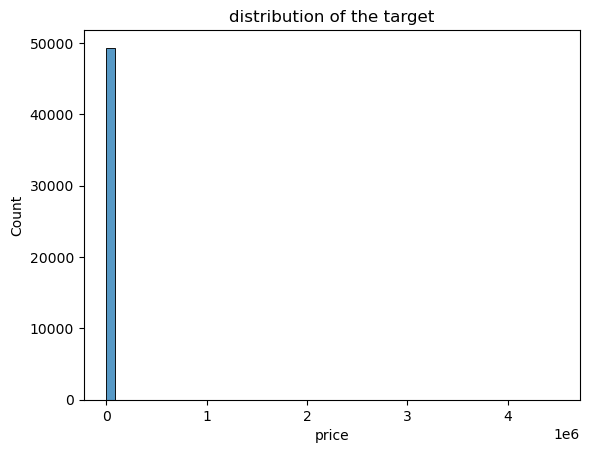

In [ ]:
sns.histplot(data=reduced_data, x="price", bins=50)
plt.title("Distribution of the target")

Text(0.5, 1.0, 'Boxplot')

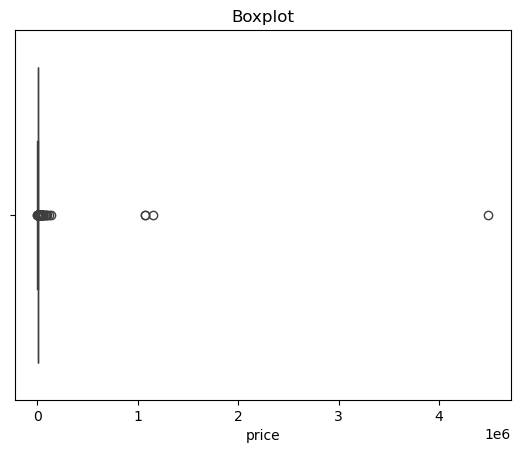

In [ ]:
sns.boxplot(data=reduced_data, x="price")
plt.title("Boxplot")

In [ ]:
lower_bound = reduced_data["price"].quantile(0.01)
upper_bound = reduced_data["price"].quantile(0.99)
filtered_data = reduced_data[
    (reduced_data["price"] >= lower_bound) & (reduced_data["price"] <= upper_bound)
]
filtered_data

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


Text(0.5, 1.0, 'Distribution of the target after filtering')

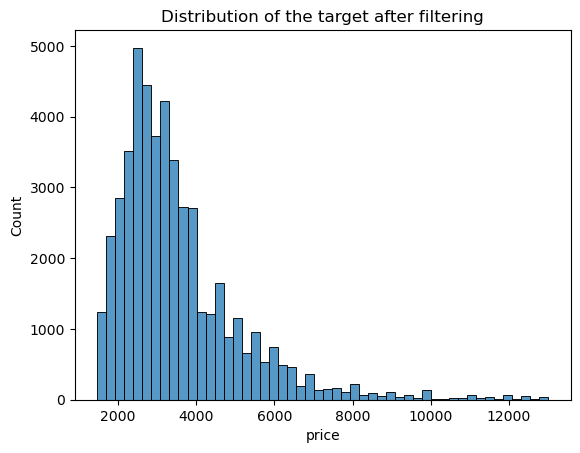

In [ ]:
sns.histplot(data=filtered_data, x="price", bins=50)
plt.title("Distribution of the target after filtering")

In [62]:
filtered_data.dtypes

# Object type

bathrooms         float64
bedrooms            int64
interest_level     object
price               int64
dtype: object

In [ ]:
filtered_data.groupby("interest_level").count()["price"]

interest_level
high       3566
low       33697
medium    11116
Name: price, dtype: int64

In [ ]:
map_dict = {"low": 0, "medium": 1, "high": 2}

filtered_data["interest_level"] = filtered_data["interest_level"].map(map_dict)
filtered_data

/var/folders/2k/ypk1ygx55335y50cc6vtc6sh0000gn/T/ipykernel_17365/183727576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['interest_level'] = filtered_data['interest_level'].map(map_dict)


,bathrooms,bedrooms,interest_level,price
4,1.0,1,1,2400
6,1.0,2,0,3800
9,1.0,2,1,3495
10,1.5,3,1,3000
15,1.0,0,0,2795
...,...,...,...,...
124000,1.0,3,0,2800
124002,1.0,2,1,2395
124004,1.0,1,1,1850
124008,1.0,2,1,4195


Text(0.5, 1.0, 'Distribution of bathrooms')

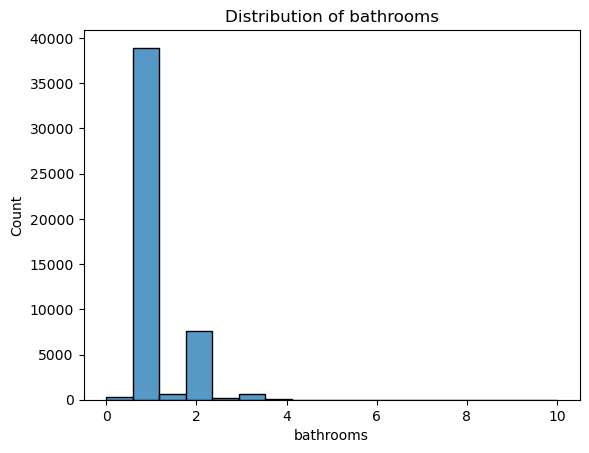

In [ ]:
sns.histplot(data=filtered_data, x="bathrooms")
plt.title("Distribution of bathrooms")

Text(0.5, 1.0, 'Distribution of bedrooms')

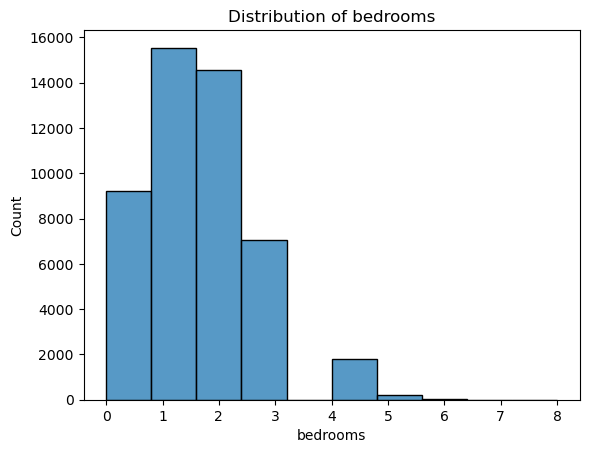

In [ ]:
sns.histplot(data=filtered_data, x="bedrooms", bins=10)
plt.title("Distribution of bedrooms")

In [86]:
corr_matrix = filtered_data.corr()
corr_matrix

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517574,-0.063635,0.671943
bedrooms,0.517574,1.000000,0.050654,0.545948
interest_level,-0.063635,0.050654,1.000000,-0.200111
price,0.671943,0.545948,-0.200111,1.000000


<Axes: >

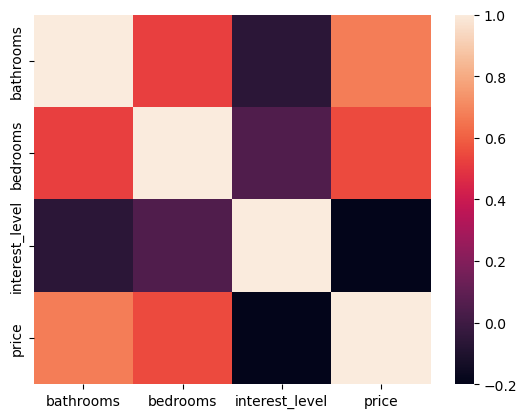

In [87]:
sns.heatmap(corr_matrix)

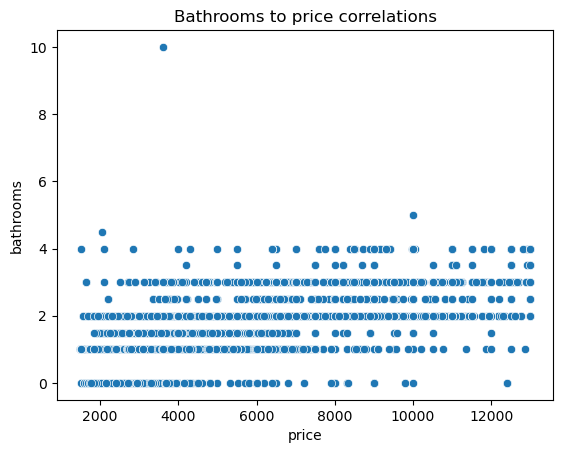

In [ ]:
sns.scatterplot(data=filtered_data, x="price", y="bathrooms")
plt.title("Bathrooms to price correlations")
plt.show()

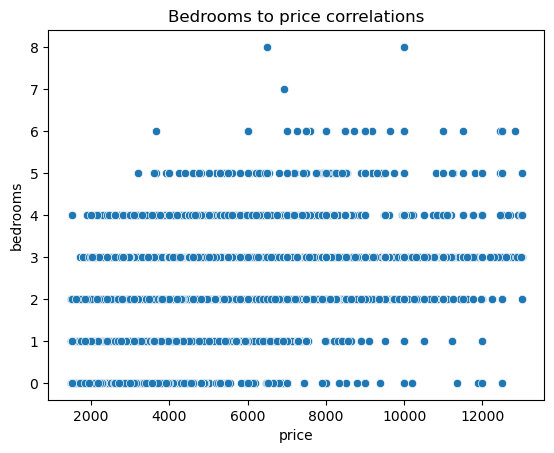

In [ ]:
sns.scatterplot(data=filtered_data, x="price", y="bedrooms")
plt.title("Bedrooms to price correlations")
plt.show()

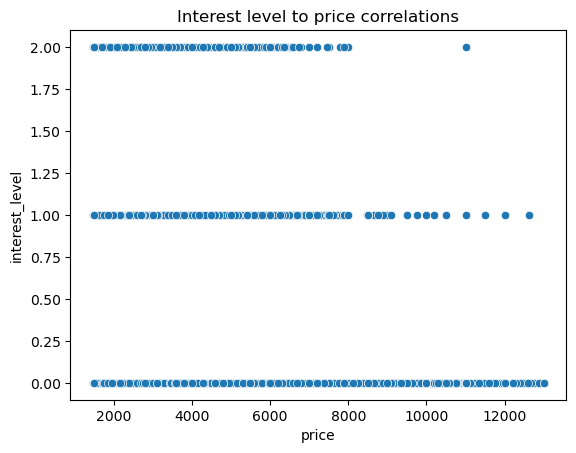

In [ ]:
sns.scatterplot(data=filtered_data, x="price", y="interest_level")
plt.title("Interest level to price correlations")
plt.show()

In [ ]:
squared_data = filtered_data.copy()

squared_data["bathrooms_squared"] = squared_data["bathrooms"] ** 2
squared_data["bedrooms_squared"] = squared_data["bedrooms"] ** 2
squared_data["interest_level_squared"] = squared_data["interest_level"] ** 2
squared_data["bathrooms_interest"] = (
    squared_data["bathrooms"] * squared_data["interest_level"]
)
squared_data["bedrooms_interest"] = (
    squared_data["bedrooms"] * squared_data["interest_level"]
)

price_col = squared_data.pop("price")
squared_data["price"] = price_col

squared_data


,bathrooms,bedrooms,interest_level,bathrooms_squared,bedrooms_squared,interest_level_squared,bathrooms_interest,bedrooms_interest,price
4,1.0,1,1,1.00,1,1,1.0,1,2400
6,1.0,2,0,1.00,4,0,0.0,0,3800
9,1.0,2,1,1.00,4,1,1.0,2,3495
10,1.5,3,1,2.25,9,1,1.5,3,3000
15,1.0,0,0,1.00,0,0,0.0,0,2795
...,...,...,...,...,...,...,...,...,...
124000,1.0,3,0,1.00,9,0,0.0,0,2800
124002,1.0,2,1,1.00,4,1,1.0,2,2395
124004,1.0,1,1,1.00,1,1,1.0,1,1850
124008,1.0,2,1,1.00,4,1,1.0,2,4195


In [102]:
corr_squared_matrix = squared_data.corr()

corr_squared_matrix

,bathrooms,bedrooms,interest_level,bathrooms_squared,bedrooms_squared,interest_level_squared,bathrooms_interest,bedrooms_interest,price
bathrooms,1.000000,0.517574,-0.063635,0.956023,0.548760,-0.059410,0.091751,0.079841,0.671943
bedrooms,0.517574,1.000000,0.050654,0.478817,0.928277,0.039511,0.139853,0.370547,0.545948
interest_level,-0.063635,0.050654,1.000000,-0.068558,0.046340,0.944013,0.936389,0.779338,-0.200111
bathrooms_squared,0.956023,0.478817,-0.068558,1.000000,0.522227,-0.062240,0.071626,0.060128,0.648486
bedrooms_squared,0.548760,0.928277,0.046340,0.522227,1.000000,0.035718,0.144169,0.333333,0.543406
interest_level_squared,-0.059410,0.039511,0.944013,-0.062240,0.035718,1.000000,0.877268,0.734061,-0.182672
bathrooms_interest,0.091751,0.139853,0.936389,0.071626,0.144169,0.877268,1.000000,0.834990,-0.105898
bedrooms_interest,0.079841,0.370547,0.779338,0.060128,0.333333,0.734061,0.834990,1.000000,0.000378
price,0.671943,0.545948,-0.200111,0.648486,0.543406,-0.182672,-0.105898,0.000378,1.000000


<Axes: >

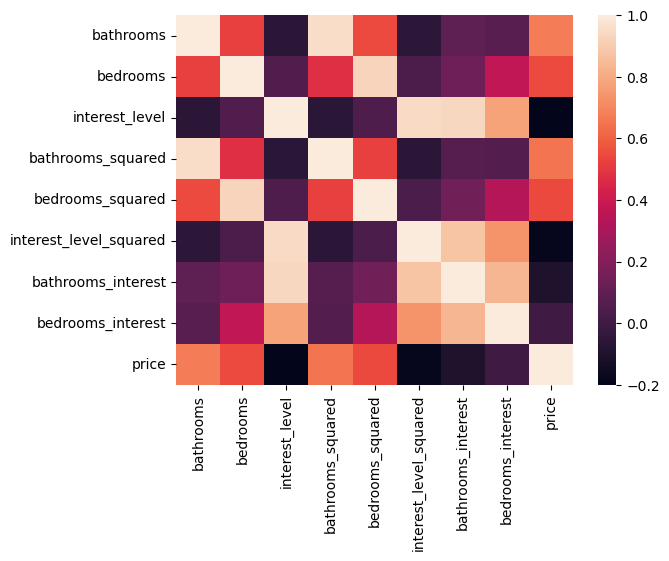

In [103]:
sns.heatmap(corr_squared_matrix)

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

poly = PolynomialFeatures(degree=10)

training_data = pd.read_json("../datasets/train.json")
testing_data = pd.read_json("../datasets/test.json")

In [ ]:
training_data


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


In [109]:
testing_data

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124003,1.0,1,bd863d28a6b119ac3bc72d5f27b07f24,2016-04-26 16:09:55,BRAND NEW TO MARKET 1BDR \r107TH AND LEXINGTON...,150 EAST 107TH STREET,[],40.7925,6928108,-73.9454,453d46f8113e1f2c730c2ee5a4469c71,[https://photos.renthop.com/2/6928108_231eb983...,1700,158 EAST 107TH STREET
124005,1.0,2,9174b75c0cd978eb0e5aa93afbad754b,2016-04-21 05:06:19,Convertible 2BR apartment features a brand new...,E 33rd St.,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7456,6906674,-73.9797,2983e45f7e0ad87d677dacd13e362785,[https://photos.renthop.com/2/6906674_9fe899a8...,4195,141 E 33rd St.
124006,1.0,0,0,2016-04-20 01:31:52,"Let's get you in to see this $2,400/mo, recent...",Lexington Avenue,"[Dogs Allowed, Cats Allowed]",40.7416,6897967,-73.9829,e6472c7237327dd3903b3d6f6a94515a,[],2400,95 Lexington Avenue
124007,2.0,2,c90c010e5505365676538e64d02aa1e0,2016-04-08 02:26:45,CooperCooper.com :: Web ID #171357; Access 100...,Park Avenue,"[Doorman, Elevator, Cats Allowed, Dogs Allowed]",40.7485,6842183,-73.9800,6e5c10246156ae5bdcd9b487ca99d96a,[https://photos.renthop.com/2/6842183_b1fe51f4...,6895,41 Park Avenue


In [ ]:
X_train = training_data[["bathrooms", "bedrooms"]]
y_train = training_data["price"]

t_lower_bound = training_data["price"].quantile(0.01)
t_upper_bound = training_data["price"].quantile(0.99)
training_data = training_data[
    (training_data["price"] >= t_lower_bound)
    & (training_data["price"] <= t_upper_bound)
]
training_data

X_test = testing_data[["bathrooms", "bedrooms"]]
y_test = testing_data["price"]

In [139]:
X_train

,bathrooms,bedrooms
4,1.0,1
6,1.0,2
9,1.0,2
10,1.5,3
15,1.0,0
...,...,...
124000,1.0,3
124002,1.0,2
124004,1.0,1
124008,1.0,2


In [119]:
poly = PolynomialFeatures(degree=10)

poly.fit(X_train, y_train)

X_train = poly.transform(X_train)
X_test = poly.transform(X_test)

X_train

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       [1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       ...,
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       [1.0000e+00, 1.0000e+00, 3.0000e+00, ..., 6.5610e+03, 1.9683e+04,
        5.9049e+04]])

In [ ]:
X_train = training_data[["bathrooms", "bedrooms"]]
y_train = training_data["price"]

X_test = testing_data[["bathrooms", "bedrooms"]]
y_test = testing_data["price"]

In [141]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)
y_pred_linreg_train = linreg.predict(X_train)

tree = DecisionTreeRegressor(random_state=21)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_pred_tree_train = tree.predict(X_train)

In [149]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

mae_lr_test = mean_absolute_error(y_test, y_pred_linreg)
mse_lr_test = root_mean_squared_error(y_test, y_pred_linreg)

mae_tr_test = mean_absolute_error(y_test, y_pred_tree)
mse_tr_test = root_mean_squared_error(y_test, y_pred_tree)

mae_lr_train = mean_absolute_error(y_train, y_pred_linreg_train)
mse_lr_train = root_mean_squared_error(y_train, y_pred_linreg_train)

mae_tr_train = mean_absolute_error(y_train, y_pred_tree_train)
mse_tr_train = root_mean_squared_error(y_train, y_pred_tree_train)

In [ ]:
data_mae = {
    "model": ["linreg", "tree", "mean", "median"],
    "train": [mae_lr_train, mae_tr_train, y_train.mean(), y_train.median()],
    "test": [mae_lr_test, mae_tr_test, y_test.mean(), y_test.median()],
}

pd.DataFrame(data=data_mae)

,model,train,test
0,linreg,784.563837,986.046717
1,tree,756.044735,953.592155
2,mean,3538.636888,3749.032829
3,median,3150.000000,3150.000000


In [ ]:
data_mse = {
    "model": ["linreg", "tree", "mean", "median"],
    "train": [mse_lr_train, mse_tr_train, y_train.mean(), y_train.median()],
    "test": [mse_lr_test, mse_tr_test, y_test.mean(), y_test.median()],
}

pd.DataFrame(data=data_mse)

,model,train,test
0,linreg,1123.877748,9625.054818
1,tree,1077.483596,9589.260857
2,mean,3538.636888,3749.032829
3,median,3150.000000,3150.000000


In [145]:
tree.feature_importances_

array([0.87084431, 0.12915569])

[Text(0.3513454861111111, 0.9583333333333334, 'x[0] <= 1.75\nsquared_error = 2552474.835\nsamples = 48379\nvalue = 3538.637'),
 Text(0.11024305555555555, 0.875, 'x[1] <= 0.5\nsquared_error = 951975.843\nsamples = 39875\nvalue = 3069.59'),
 Text(0.23079427083333331, 0.9166666666666667, 'True  '),
 Text(0.027777777777777776, 0.7916666666666666, 'x[0] <= 0.5\nsquared_error = 406736.694\nsamples = 9171\nvalue = 2486.186'),
 Text(0.013888888888888888, 0.7083333333333334, 'squared_error = 1509056.734\nsamples = 150\nvalue = 2887.14'),
 Text(0.041666666666666664, 0.7083333333333334, 'x[0] <= 1.25\nsquared_error = 385689.847\nsamples = 9021\nvalue = 2479.519'),
 Text(0.027777777777777776, 0.625, 'squared_error = 383005.615\nsamples = 9012\nvalue = 2478.609'),
 Text(0.05555555555555555, 0.625, 'squared_error = 2241670.988\nsamples = 9\nvalue = 3391.111'),
 Text(0.19270833333333334, 0.7916666666666666, 'x[1] <= 2.5\nsquared_error = 982805.803\nsamples = 30704\nvalue = 3243.847'),
 Text(0.1180555

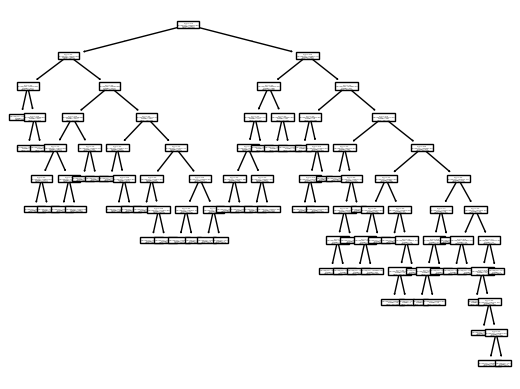

In [155]:
from sklearn.tree import plot_tree

plot_tree(tree)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=20, max_depth=10)

model.fit(X_train, y_train)
